# Actividad 2: Clasificación con máquina de vectores de soporte y redes de neuronas
### _Apellidos_: Ruano Roca, _Nombres_: Miguel Angel Omar

1. Análisis descriptivo de los datos:
- 1.1 De las variables numéricas, halla datos estadísticos.
- 1.2 De las variables categóricas, lista las diferentes categorías y 
halla la frecuencia de cada una de ellas. 
- 1.3 Crea matriz de correlaciones existentes entre las 
variables numéricas del conjunto de datos, analiza los 
resultados. 

2. Aplica máquina de vectores de soporte y redes neuronales. 
- 2.1 Compara, mediante las medidas que te parezcan 
adecuadas, la capacidad predictiva de ambos métodos. 
- 2.2 Comenta las ventajas y desventajas de cada 
modelo. 
- 2.3 De acuerdo con los resultados, ¿son realmente útiles los 
modelos creados para el conjunto de datos propuesto?
(Justificar en base a los resultados experimentales)
- 2.4 Otros comentarios que consideres adecuados

In [2]:
#%% Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Importing the dataset

df = pd.read_csv("train.csv", low_memory=False)
dataset = df.copy()
train = df.copy().drop(dataset.columns[20], axis=1)
type(train)
train # todas las columnas excepto 'price_range'

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [3]:
train.isnull().sum().sort_values(ascending=False)

battery_power    0
blue             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
px_height        0
pc               0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
wifi             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## 1.1 De las variables numéricas, halla datos estadísticos.

In [5]:
'''
ANALISIS EXPLORATORIO Y PREPROCESAMIENTO
'''
for column in df.columns:
    print("\nDatos estadísticos de ", column)
    print(df[column].describe())


Datos estadísticos de  battery_power
count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

Datos estadísticos de  blue
count    2000.0000
mean        0.4950
std         0.5001
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: blue, dtype: float64

Datos estadísticos de  clock_speed
count    2000.000000
mean        1.522250
std         0.816004
min         0.500000
25%         0.700000
50%         1.500000
75%         2.200000
max         3.000000
Name: clock_speed, dtype: float64

Datos estadísticos de  dual_sim
count    2000.000000
mean        0.509500
std         0.500035
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: dual_sim, dtype: float64

Datos estadísticos de  fc
count    2000.000000
mean        4.309500
std        

In [6]:
df.isnull()
dataNull = df.isnull().sum()
print([dataNull[dataNull > 0]])
print([dataNull[dataNull > 0]/df.shape[0]])

[Series([], dtype: int64)]
[Series([], dtype: float64)]


## 1.2 De las variables categóricas, lista las diferentes categorías y halla la frecuencia de cada una de ellas. 

In [7]:
df['price_range'] = df['price_range'].astype(str)
df = df.replace(str(0), 'cero')
df = df.replace(str(1), 'uno')
df = df.replace(str(2), 'dos')
df = df.replace(str(3), 'tres')
'''
Frecuencia de cada clase price_range
'''
dfcat = df.select_dtypes(exclude=['int64', 'float64']) # excluyo todos los valores numericos
print("\nCategorical column")
for col in dfcat.columns:
    print(dfcat[col].name) # imprime el nombre de las categorias
    print(dfcat[col].unique()) # imprime el nombre de los elementos unicos de cada categoria
    print(dfcat[col].value_counts().reset_index(name="freq"))

#df['price_range'].hist()
#df['ram'].hist()
#df['battery_power'].hist()
df = dataset.copy()
df.info()


Categorical column
price_range
['uno' 'dos' 'tres' 'cero']
  index  freq
0   uno   500
1  tres   500
2   dos   500
3  cero   500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w      

<AxesSubplot:>

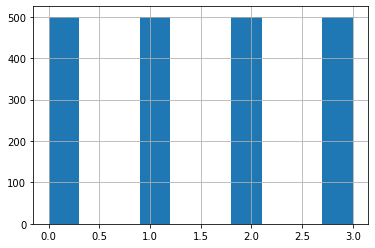

In [8]:
df['price_range'].hist()

<AxesSubplot:>

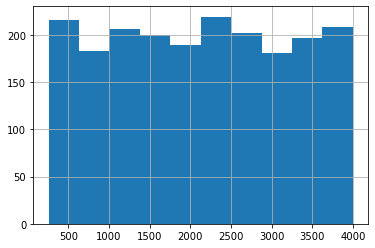

In [9]:
df['ram'].hist()

<AxesSubplot:>

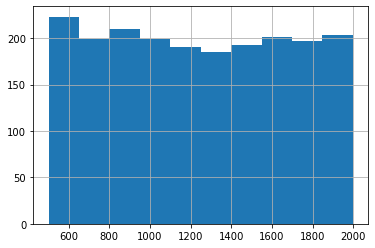

In [10]:
df['battery_power'].hist()

## 1.3 Crea matriz de correlaciones existentes entre las variables numéricas del conjunto de datos, analiza los resultados. 

- Correlaciones entre variables indepediente y variablo objetivo

In [11]:
dfc = dataset.copy()
corr = dfc.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [12]:
print("lista correlaciones con Variable price_range: \n", corr["price_range"].sort_values(ascending=False).round(2))

lista correlaciones con Variable price_range: 
 price_range      1.00
ram              0.92
battery_power    0.20
px_width         0.17
px_height        0.15
int_memory       0.04
sc_w             0.04
pc               0.03
three_g          0.02
sc_h             0.02
fc               0.02
talk_time        0.02
blue             0.02
wifi             0.02
dual_sim         0.02
four_g           0.01
n_cores          0.00
m_dep            0.00
clock_speed     -0.01
mobile_wt       -0.03
touch_screen    -0.03
Name: price_range, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap')

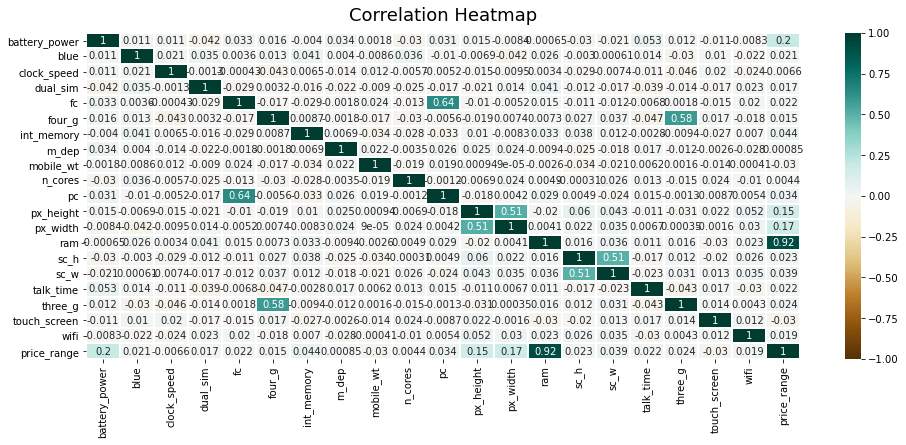

In [13]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="BrBG", linecolor='white', linewidths=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

## 1.3 Correlaciones entre variables.

In [14]:
for column in corr.columns:
    a=corr[column][(corr[column]>.5) & (corr[column]<1)]
    if not a.empty:
        print(corr[column].name)
        print(a, "\n")

fc
pc    0.644595
Name: fc, dtype: float64 

four_g
three_g    0.584246
Name: four_g, dtype: float64 

pc
fc    0.644595
Name: pc, dtype: float64 

px_height
px_width    0.510664
Name: px_height, dtype: float64 

px_width
px_height    0.510664
Name: px_width, dtype: float64 

ram
price_range    0.917046
Name: ram, dtype: float64 

sc_h
sc_w    0.506144
Name: sc_h, dtype: float64 

sc_w
sc_h    0.506144
Name: sc_w, dtype: float64 

three_g
four_g    0.584246
Name: three_g, dtype: float64 

price_range
ram    0.917046
Name: price_range, dtype: float64 



# Análisis descriptivo de los datos

In [15]:
#%% Dividiendo el dataset entre Training set y test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = dataset.copy()
## train # todas las columnas excepto 'price_range'
train = df.drop(dataset.columns[20], axis=1)
#%Check missing values and set x and y
train.isnull().sum().sort_values(ascending=False)

X = train[['battery_power', 'ram']]
y = dataset["price_range"].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0)

#print(Xtrain)
#print(Xtest)

print(Xtrain.mean())
print(Xtrain.std())

battery_power    1232.710625
ram              2103.685000
dtype: float64
battery_power     442.100533
ram              1077.413287
dtype: float64


## Aplicando máquina de vectores de soporte sobre los datos de entrenamiento

In [16]:
from sklearn import svm
from sklearn import metrics

X = train[['battery_power', 'ram']]
y = dataset["price_range"].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0)

svm_model = svm.SVC(kernel= "linear", random_state = 0)
svm_model.fit(Xtrain, ytrain)
print("Score: ", svm_model.score(Xtrain, ytrain))

# Predictiong the Test set results
predictions = svm_model.predict(Xtest)
print(predictions)

Score:  0.829375
[3 0 2 2 3 0 0 3 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 1 2 3 1 3 1 2 0 2 0 2 3 0
 0 3 3 3 1 3 3 1 3 0 1 2 2 1 3 0 3 0 3 3 1 0 3 3 1 3 2 2 2 3 3 2 2 3 2 1 0
 1 3 2 2 2 2 3 2 3 0 0 0 2 0 2 3 1 3 2 1 0 3 2 3 0 3 1 1 3 1 3 2 2 2 2 3 3
 0 0 1 3 3 0 1 0 0 0 3 2 2 2 2 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 3 1 0 3 1 2 3 3 0 2 2 3 1 3 1 0 2 3
 1 2 0 3 3 1 1 1 3 3 0 1 3 1 0 3 3 2 1 1 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 2 3 1 0 2 0 0 0 3 3 0 1 2 0 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 1 3 2
 2 0 0 1 2 3 2 2 3 2 2 1 3 3 2 2 3 3 2 2 1 0 2 2 1 0 0 2 2 2 2 0 2 3 0 1 2
 3 0 1 0 0 1 3 0 0 2 3 1 2 1 1 0 3 0 3 3 3 3 0 1 2 0 1 2 0 1 0 3 1 0 3 1 0
 1 3 0 3 1 2 0 1 3 0 1 1 1 2 1 2 0 2 0 1 3 1 3 3 1 2 0 3 3 2 1 3 2 3 3 3 0
 3 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 1 3 1 0 0 3 1]


In [17]:
svm_model1 = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)
svm_model1.fit(Xtrain, ytrain)
print("Score: ", svm_model1.score(Xtrain, ytrain))
predictions1 = svm_model1.predict(Xtest)
print(predictions1)

Score:  0.829375
[3 0 2 2 3 0 0 3 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 1 2 3 1 3 1 2 0 2 0 2 3 0
 0 3 3 3 1 3 3 1 3 0 1 2 2 1 3 0 3 0 3 3 1 0 3 3 1 3 2 2 2 3 3 2 2 3 2 1 0
 1 3 2 2 2 2 3 2 3 0 0 0 2 0 2 3 1 3 2 1 0 3 2 3 0 3 1 1 3 1 3 2 2 2 2 3 3
 0 0 1 3 3 0 1 0 0 0 3 2 2 2 2 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 3 1 0 3 1 2 3 3 0 2 2 3 1 3 1 0 2 3
 1 2 0 3 3 1 1 1 3 3 0 1 3 1 0 3 3 2 1 1 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 2 3 1 0 2 0 0 0 3 3 0 1 2 0 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 1 3 2
 2 0 0 1 2 3 2 2 3 2 2 1 3 3 2 2 3 3 2 2 1 0 2 2 1 0 0 2 2 2 2 0 2 3 0 1 2
 3 0 1 0 0 1 3 0 0 2 3 1 2 1 1 0 3 0 3 3 3 3 0 1 2 0 1 2 0 1 0 3 1 0 3 1 0
 1 3 0 3 1 2 0 1 3 0 1 1 1 2 1 2 0 2 0 1 3 1 3 3 1 2 0 3 3 2 1 3 2 3 3 3 0
 3 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 1 3 1 0 0 3 1]


In [18]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(ytest, predictions)
print(cnf_matrix)
print("Accurancy:", metrics.accuracy_score(ytest, predictions))
# Otra forma de obtener accurancy
accurancy = np.true_divide(np.sum(predictions == ytest), predictions.shape[0])*100
print(accurancy)


[[ 88   7   0   0]
 [  9  69  14   0]
 [  0  14  65  20]
 [  0   0   7 107]]
Accurancy: 0.8225
82.25


## Aplicando maquina de vectores de soporte sobre los datos de entrenamiento, una 2da corrida

In [19]:
predictions = svm_model.predict(Xtest)
print(predictions)

[3 0 2 2 3 0 0 3 3 1 0 3 0 2 3 0 3 2 2 1 0 0 3 1 1 2 3 1 3 1 2 0 2 0 2 3 0
 0 3 3 3 1 3 3 1 3 0 1 2 2 1 3 0 3 0 3 3 1 0 3 3 1 3 2 2 2 3 3 2 2 3 2 1 0
 1 3 2 2 2 2 3 2 3 0 0 0 2 0 2 3 1 3 2 1 0 3 2 3 0 3 1 1 3 1 3 2 2 2 2 3 3
 0 0 1 3 3 0 1 0 0 0 3 2 2 2 2 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 3 1 0 3 1 2 3 3 0 2 2 3 1 3 1 0 2 3
 1 2 0 3 3 1 1 1 3 3 0 1 3 1 0 3 3 2 1 1 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 2 3 1 0 2 0 0 0 3 3 0 1 2 0 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 1 3 2
 2 0 0 1 2 3 2 2 3 2 2 1 3 3 2 2 3 3 2 2 1 0 2 2 1 0 0 2 2 2 2 0 2 3 0 1 2
 3 0 1 0 0 1 3 0 0 2 3 1 2 1 1 0 3 0 3 3 3 3 0 1 2 0 1 2 0 1 0 3 1 0 3 1 0
 1 3 0 3 1 2 0 1 3 0 1 1 1 2 1 2 0 2 0 1 3 1 3 3 1 2 0 3 3 2 1 3 2 3 3 3 0
 3 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 1 3 1 0 0 3 1]


In [20]:
cnf_matrix = confusion_matrix(ytest, predictions)
print(cnf_matrix)

[[ 88   7   0   0]
 [  9  69  14   0]
 [  0  14  65  20]
 [  0   0   7 107]]


In [21]:
print("Testing Accurancy:", metrics.accuracy_score(ytest, predictions))

Testing Accurancy: 0.8225


In [22]:
print("Training Score: ", svm_model.score(Xtrain, ytrain))

Training Score:  0.829375


In [23]:
from sklearn.model_selection import cross_val_score

accurancies = cross_val_score(estimator = svm_model, X=Xtrain, y=ytrain, cv=10)
print("Accurancy: {:.2f} %".format(accurancies.mean()*100))
print("Standard deviation: {:.2f} %".format(accurancies.std()*100))


Accurancy: 82.63 %
Standard deviation: 2.62 %


1.391479524196863e-16
0.9999999999999998


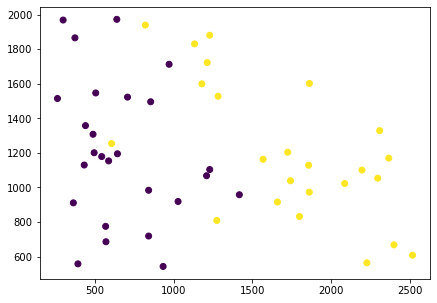

In [24]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import random
from sklearn.model_selection import GridSearchCV

import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

df = dataset.copy()
#datos = make_moon(n_samples = 300, noise=0.20, random_state=0)
train = df.drop(df[df['price_range'] >= 2].index)
# train no tiene price_range
train = train[['battery_power', 'ram', 'price_range']]
train = train.sample(frac=0.05)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

y = train['price_range']
X = train[['battery_power', 'ram']]
X = sc.fit_transform(train)
type(train)
train.columns

print(X.mean())
print(X.std())

df_x = train['ram']
df_y = train['battery_power']
df_group = y

f, axs = plt.subplots(1,1,figsize=(7, 5))
axs.scatter(df_x, df_y, c=df_group)

### Con las variables RAM, battery_power

In [25]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
import random
import matplotlib.colors as ListedColormap

#df = dataset.copy()
df = pd.read_csv("train.csv", low_memory=False)
dataset = df.copy()

train3 = df.drop(df[df['price_range'] <= 2].index)
train0 = df.drop(df[df['price_range'] >= 1].index)
train = pd.concat([train0, train3], axis=0)

train = train[['battery_power', 'ram', 'price_range']]
train = train.sample(frac=0.1)


2.7755575615628914e-17
1.0


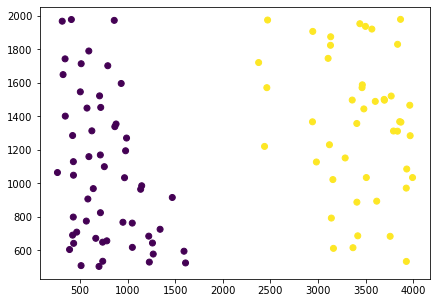

In [44]:
y = train['price_range']
X = train[['battery_power', 'ram']]

df_x = train['ram']
df_y = train['battery_power']
df_group = y

fig, ax = plt.subplots(1,1,figsize=(7, 5))
ax.scatter(df_x, df_y, c=df_group)

df_pd = pd.DataFrame(list(zip(df_x, df_y, df_group)), columns=['x', 'y', 'group'])

X_train, X_test, y_train, y_test = train_test_split(df_pd[['x', 'y']],
                                                     df_pd['group'],
                                                     test_size=0.2,
                                                     stratify=df_pd['group'])

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.mean())
print(X_train.std())

In [27]:
train

,battery_power,ram,price_range
1709,1922,3564,3
974,672,667,0
317,1170,715,0
286,612,3161,3
9,509,513,0
...,...,...,...
189,1831,3834,3
1750,1339,867,0
867,1498,3358,3
463,965,1138,0


In [28]:
train0

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
14,1866,0,0.5,0,13,1,52,0.7,185,1,...,356,563,373,14,9,3,1,0,1,0
15,775,0,1.0,0,3,0,46,0.7,159,2,...,862,1864,568,17,15,11,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,618,1,1.0,0,9,1,13,0.1,80,4,...,591,724,1424,15,12,7,1,1,0,0
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0


In [29]:
train3

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
11,1520,1,2.2,0,5,1,33,0.5,177,8,...,151,1005,3826,14,9,13,1,1,1,3
16,838,0,0.5,0,1,1,13,0.1,196,8,...,984,1850,3554,10,9,19,1,0,1,3
17,595,0,0.9,1,7,1,23,0.1,121,3,...,441,810,3752,10,2,18,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3


In [30]:
X_train

array([[ 0.86609393, -0.47185422],
       [ 1.37809582,  0.31258571],
       [-1.12275222, -0.2292673 ],
       [ 1.30505703, -1.24042397],
       [-0.54063309, -1.58956775],
       [ 1.3306206 ,  0.18562433],
       [ 1.01436266,  0.6050503 ],
       [ 0.29712178,  1.1128958 ],
       [ 1.16482256,  1.56632929],
       [-0.95111107, -1.26762998],
       [-1.12859532,  0.12441081],
       [ 1.45551693,  0.53476811],
       [ 1.47669818, -0.44464821],
       [-0.51653029, -1.33111067],
       [ 0.71198209,  1.53458894],
       [ 1.45843848,  0.12214364],
       [-0.75609751,  0.82949988],
       [ 1.3130913 ,  0.65946232],
       [-0.88537616, -0.29728233],
       [-0.92189556,  0.66172949],
       [-0.51068719, -1.48074372],
       [-1.01173326, -0.73484564],
       [-1.09718864, -1.18374479],
       [ 1.43214452, -0.32902267],
       [ 1.04942128,  0.28764687],
       [-1.02341947, -1.03411174],
       [-0.8590822 ,  1.06981962],
       [ 0.85440772, -0.99330272],
       [-0.45809927,

In [31]:
X_test

array([[-1.12202183e+00, -4.12907865e-01],
       [-1.15196773e+00, -1.41953020e+00],
       [ 1.36129689e+00,  1.83357165e-01],
       [-9.16052455e-01, -1.38580608e-01],
       [-5.99064123e-01, -5.55739412e-01],
       [-1.12859532e+00, -1.22455380e+00],
       [-2.63085707e-01, -1.60090359e+00],
       [-7.30533938e-01, -4.46915376e-01],
       [-1.12056106e+00, -1.33564500e+00],
       [-9.26277885e-01, -1.64851411e+00],
       [ 1.20207234e+00, -7.64318814e-01],
       [-9.81056974e-01,  1.87891499e-01],
       [ 8.39799962e-01, -2.83395927e-04],
       [ 1.02020576e+00, -1.39459135e+00],
       [ 8.70476252e-01, -1.40366002e+00],
       [ 1.38759086e+00,  3.05784205e-01],
       [ 3.59935138e-01,  7.72820692e-01],
       [-1.20820760e+00,  1.67288615e+00],
       [ 1.07279369e+00,  1.63887864e+00],
       [ 1.42849258e+00, -5.87479756e-01]])

## Preparando el plor de limite de decision

In [48]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

df_pd1 = df_pd.copy()
x_min, x_max = df_pd1['x'].min()-0.1 , df_pd1['x'].max()+0.1
y_min, y_max = df_pd1['y'].min()-0.1 , df_pd1['y'].max()+0.1

def plot_decision_boundary(x, y, labels, model,
                            x_min = x_min,
                            x_max = x_max,
                            y_min = y_min,
                            y_max = y_max,
                            grid_step = 0.2
                            ):
    xx, yy = np.meshgrid(  np.arange(x_min, x_max, grid_step),
                            np.arange(y_min, y_max, grid_step))

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    arr = plt.cm.coolwarm(np.arange(plt.cm.coolwarm.N))
    arr_hsv = mpl.colors.rgb_to_hsv(arr[:,0:3])
    arr_hsv[:, 2] = arr_hsv[:, 2] * 1.5
    arr_hsv[:, 1] = arr_hsv[:, 1] * .5
    arr_hsv =  np.clip(arr_hsv, 0, 1)
    arr[:, 0: 3] = mpl.colors.hsv_to_rgb(arr_hsv)
    my_cmap = ListedColormap(arr)

    fig, ax = plt.subplots(1, 1, figsize = (7, 7))
    plt.pcolormesh(xx, yy, Z, cmap=my_cmap, shading='auto')

    ax.scatter(x,y, c=labels, cmap='coolwarm')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_xlim(yy.min(), yy.max())
    ax.grid(False)

dfx = [x[0] for x in X_test]
dfy = [x[1] for x in X_test]

clf = svm.SVC(C=1, gamma=10, probability=True)
clf.fit(X_train, y_train)

#plot_decision_boundary(dfx, dfy, y_test, clf)


SVC(C=1, gamma=10, probability=True)

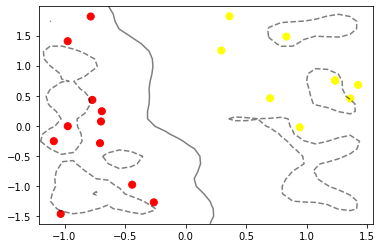

In [54]:
dfx = [x[0] for x in X_test]
dfy = [x[1] for x in X_test]
# plot_decision_boundary(dfx, dfy, y_test, clf)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    '''Plot the decision function for a 2D SVC'''
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
                levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter( model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(dfx, dfy, c=y_test, s=50, cmap='autumn')
clf = svm.SVC(C=1, gamma=10, probability=True)
clf.fit(X_train, y_train)

plot_svc_decision_function(clf)

## Definimos parametros y medimos

In [1]:
from sklearn import svm
from sklearn import metrics
print("Score: ", clf.score(X_train, y_train))
predictions = clf.predict(X_train)

predictions = clf.predict(X_test)
predictions

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, predictions)
print(cnf_matrix)
print("Accuracy:", metrics.accuracy_score(y_test, predictions))

accuracy = np.true_divide(np.sum(predictions == y_test), predictions.shape[0])*100
print(accuracy)

NameError: name 'clf' is not defined

In [56]:
from sklearn import svm, metrics

print("Score: ", clf.score(X_train, y_train))

predictions = clf.predict(X_train)
predictions = clf.predict(X_test)
predictions

Score:  1.0


array([0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0],
      dtype=int64)

In [57]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, predictions)

print(cnf_matrix)

print("Accuracy:", metrics.accuracy_score(y_test, predictions))

accuracy = np.true_divide(np.sum(predictions == y_test), predictions.shape[0])*100

print(accuracy)

[[11  0]
 [ 0  9]]
Accuracy: 1.0
100.0


## Busqueda de parametros

In [58]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

param_grid = {"kernel": ('linear', 'rbf'), "C" : [1, 10, 100]}
base_estimator = svm.SVC()

grid = GridSearchCV(estimator=base_estimator,
                    param_grid=param_grid,
                    scoring='accuracy',
                    n_jobs=1,
                    cv=5,
                    refit=True)

grid = grid.fit(Xtrain, ytrain)
print("Accuracy:", metrics.accuracy_score(ytest, predictions))
# print best parameter after tuning
print(grid.best_params_)
print(grid.cv_results_)
print(grid.best_estimator_)

print(grid.best_estimator_)
means = grid.cv_results_['mean_test_score']
params = grid.cv_results_['params']
print(means)
print(params)


## Mas busqueda de parametros

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report
# con scaling
kernels = ['Polynomial', 'RBF', 'Sigmoid', 'Linear']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return svm.SVC(kernel="poly", degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return svm.SVC(kernel="rbf", gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return svm.SVC(kernel="sigmoid", gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return svm.SVC(kernel="linear", gamma="auto")

for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size= 0.20) # Train a SVC model
    svclassifier = getClassifier(i)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test, y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.45      0.12      0.20        80
           1       0.28      0.85      0.42        81
           2       0.29      0.14      0.19        91
           3       1.00      0.10      0.19        68

    accuracy                           0.31       320
   macro avg       0.51      0.31      0.25       320
weighted avg       0.48      0.31      0.25       320

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        91
           1       0.80      0.82      0.81        83
           2       0.81      0.87      0.84        76
           3       0.97      0.94      0.96        70

    accuracy                           0.88       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.88      0.88      0.88       320

Evaluation: Sigmoid kernel
              precision    recall  f1-score   supp

## Impresion del reporte

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

print("Accuracy:", metrics.accuracy_score(ytest, predictions))
param_grid = {"kernel": ('linear', 'rbf', 'poly', 'sigmoid'), "C" : [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001]}
base_estimator = svm.SVC()

best = GridSearchCV(base_estimator, param_grid, cv=5, refit=True, verbose=2).fit(Xtrain, ytrain)
print(r2_score(list(ytest), list(best.predict(Xtest))))
print(grid.best_estimator_)
grid_predictions = best.predict(Xtest)
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, grid_predictions))

Accuracy: 0.26
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................

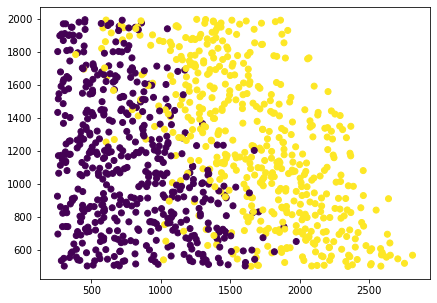

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("./train.csv", low_memory=False)
dataset = df
#train = df.drop(dataset.columns[20], axis=1)

train = df.drop(df[df['price_range'] >=2 ].index)

train = train[['battery_power', 'ram', 'price_range']]
traub = train.sample(frac=0.9)

y = train['price_range']
X = train[['battery_power', 'ram']]

df_x = train['ram']
df_y = train['battery_power']
df_group = y

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.scatter(df_x, df_y, c=df_group)


In [123]:
df_pd = pd.DataFrame(list(zip(df_x, df_y, df_group)), columns=['x', 'y', 'group'])

X_train, X_test, y_train, y_test = train_test_split(df_pd[['x', 'y']],
                                                    df_pd['group'],
                                                    test_size=0.2,
                                                    stratify=df_pd['group'])

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.mean())
print(X_train.std())

-1.3627987627273797e-16
1.0


In [ ]:

param_grid = {"kernel": ('linear', 'rbf', 'poly', 'sigmoid'), "C" : [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001]}
base_estimator = svm.SVC()
best = GridSearchCV(base_estimator, param_grid, cv=5, refit=True, verbose=2).fit(X_train, y_train)
print(r2_score(list(y_test), list(best.predict(X_test))))
print(grid.best_estimator_)
grid_predictions = best.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

Training Score:  0.82125
[[91  9  0  0]
 [12 74 14  0]
 [ 0 18 79  3]
 [ 0  0 15 85]]
Testing Accurancy: 0.8225
82.25


ValueError: cannot reshape array of size 3600 into shape (30,30)

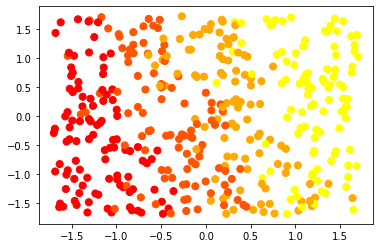

In [125]:
clf = svm.SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)
clf
clf.fit(X_train, y_train)

from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix

print("Training Score: ", clf.score(X_train, y_train))
tpredictions = clf.predict(X_train)

predictions = clf.predict(X_test)
predictions

cnf_matrix = confusion_matrix(y_test, predictions)
print(cnf_matrix)
print("Testing Accurancy:", metrics.accuracy_score(y_test, predictions))

accuracy = np.true_divide(np.sum(predictions == y_test), predictions.shape[0])*100
print(accuracy)

dfx = [x[0] for x in X_test]
dfy = [x[1] for x in X_test]

plt.scatter(dfx, dfy, c=y_test, s=50, cmap='autumn')
plot_svc_decision_function(clf)

## MLP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
# importing the dataset

df = pd.read_csv("train.csv", low_memory=False)
dataset = df
train = df.drop(dataset.columns[20], axis=1)
X=train # all columns except 'price_range'
y = df['price_range']
y

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=0)
print(Xtrain)
print(Xtest)
print(ytrain)
print(ytest)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
582            1232     0          2.9         1   1       1          24   
159            1840     0          0.5         1  12       0          34   
1827           1692     0          2.1         0   4       1           2   
318             508     0          0.8         0   7       1          42   
708             977     1          2.8         1   2       0          35   
...             ...   ...          ...       ...  ..     ...         ...   
835            1224     1          1.6         0   9       0          33   
1216           1158     0          0.7         1   1       1          29   
1653           1190     0          2.0         1   0       0          40   
559            1191     0          2.4         1   2       0          13   
684             706     0          0.5         0  13       1          31   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
582     0

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)
print(Xtrain.mean())
print(Xtrain.std())

X_train = Xtrain
y_train = ytrain
mlp = MLPClassifier(hidden_layer_sizes=(3))
mlp.fit(Xtrain,ytrain)
print('Score: ', mlp.score(Xtrain,ytrain))

predictions = mlp.predict(Xtest)
predictions
accurancy = np.true_divide(np.sum(predictions==ytest), predictions.shape[0])*100
print('Accurancy: ', accurancy)
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(ytest, predictions)
print('CNFMatrix: ', cnf_matrix)

mlp = MLPClassifier(hidden_layer_sizes=(4))
mlp.fit(Xtrain,ytrain)
print('Score: ', mlp.score(Xtrain,ytrain))

predictions = mlp.predict(Xtest)
predictions
accurancy = np.true_divide(np.sum(predictions == ytest), predictions.shape[0])*100
print('Accurancy: ', accurancy)
cnf_matrix = confusion_matrix(ytest, predictions)
print('CNFMatrix: ', cnf_matrix)


-1.5543122344752193e-17
1.0


C:\Users\miguel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score:  0.809375
Accurancy:  82.75
CNFMatrix:  [[ 72  23   0   0]
 [ 23  56  13   0]
 [  0   1  91   7]
 [  0   0   2 112]]
Score:  0.874375
Accurancy:  84.5
CNFMatrix:  [[ 92   3   0   0]
 [ 31  55   6   0]
 [  0   3  78  18]
 [  0   0   1 113]]


C:\Users\miguel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp1 = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
                    beta_2=0.999, early_stopping=False, epsilon=1e-08,
                    hidden_layer_sizes=4, learning_rate='constant',
                    learning_rate_init=0.001, max_iter=200, momentum=0.9,
                    n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
                    random_state=None, shuffle=True, solver='adam', tol=0.0001,
                    validation_fraction=0.1, verbose=False, warm_start=False)

mlp2 = MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
                    beta_2=0.999, early_stopping=False, epsilon=1e-08,
                    hidden_layer_sizes=3, learning_rate='constant',
                    learning_rate_init=0.001, max_iter=200, momentum=0.9,
                    n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
                    random_state=None, shuffle=True, solver='adam', tol=0.0001,
                    validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
print(mlp.score(Xtrain, ytrain))

0.874375


In [ ]:
predictions = mlp.predict(Xtest)

predictions

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 0, 0, 0,
       3, 0, 2, 2, 3, 0, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 3, 2, 0, 3, 3, 1, 3, 2, 0, 3,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 3, 0, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 3, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 0, 0, 0, 3, 2, 2, 1, 2, 1, 0, 0, 2, 0, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 0, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 3, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 0, 0, 1, 2, 2, 3, 0, 3, 3, 1, 1, 0, 2, 3, 0, 0, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 2, 3,
       3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 0, 1, 1, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 0, 0, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 3, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 0,

In [ ]:
accurancy = np.true_divide(np.sum(predictions==ytest), predictions.shape[0])*100
print(accurancy)

84.5


In [ ]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)

df_scaled
type(df_scaled)

numpy.ndarray

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['price_range'] = df['price_range']

In [ ]:
dataEncoded = pd.get_dummies(df_scaled, columns = ['price_range'])
print(dataEncoded)

      battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0         -0.902597 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1         -0.495139  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2         -1.537686  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3         -1.419319  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4          1.325906  1.010051    -0.395011 -1.019184  2.002254  0.957886   
...             ...       ...          ...       ...       ...       ...   
1995      -1.011860  1.010051    -1.253064  0.981177 -0.992890  0.957886   
1996       1.653694  1.010051     1.321096  0.981177 -0.992890 -1.043966   
1997       1.530773 -0.990050    -0.762748  0.981177 -0.762495  0.957886   
1998       0.622527 -0.990050    -0.762748 -1.019184 -0.071307  0.957886   
1999      -1.658331  1.010051     0.585621  0.981177  0.159088  0.957886   

      int_memory     m_dep  mobile_wt   n_cores  ...      sc_h      sc_w  \
0      -1.3

## 2 clases

In [ ]:
y = y.replace(1, 9)
y = y.replace(3, 2)
y = y/2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)
print(Xtrain.mean())
print(Xtrain.std())
Xtrain.shape
Xtest.shape

from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(3, input_dim=20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile( optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])
model.fit(  X_train, y_train, epochs = 100, batch_size = 5, verbose=True)
score = model.evaluate( X_test, y_test )
print("score = ", score)



-5.662137425588298e-18
1.0
Epoch 1/100
320/320 [==============================] - 0s 640us/step - loss: 0.3753 - accuracy: 6.2500e-04
Epoch 2/100
320/320 [==============================] - 0s 663us/step - loss: -0.2906 - accuracy: 0.0000e+00
Epoch 3/100
320/320 [==============================] - 0s 716us/step - loss: -0.9093 - accuracy: 0.0000e+00
Epoch 4/100
320/320 [==============================] - 0s 664us/step - loss: -1.5010 - accuracy: 0.0000e+00
Epoch 5/100
320/320 [==============================] - 0s 650us/step - loss: -2.0699 - accuracy: 0.0000e+00
Epoch 6/100
320/320 [==============================] - 0s 568us/step - loss: -2.6203 - accuracy: 0.0000e+00
Epoch 7/100
320/320 [==============================] - 0s 774us/step - loss: -3.1577 - accuracy: 0.0000e+00
Epoch 8/100
320/320 [==============================] - 0s 659us/step - loss: -3.6871 - accuracy: 0.0000e+00
Epoch 9/100
320/320 [==============================] - 0s 653us/step - loss: -4.2086 - accuracy: 0.0000e+00
Ep

In [ ]:
y = y.replace(1, 0)
y = y.replace(3, 2)
y = y/2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)
print(Xtrain.mean())
print(Xtrain.std())
Xtrain.shape
Xtest.shape

from keras.models import Sequential
from keras.layers import Dense, Activation

from numpy.random import seed
seed(1)

model = Sequential()
model.add(Dense(2, input_dim=20, activation='relu'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile( optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])
model.fit(  X_train, y_train, epochs = 100, batch_size = 5, verbose=True)
score = model.evaluate( X_test, y_test )
print("score = ", score)


-2.6645352591003758e-18
1.0
Epoch 1/100
320/320 [==============================] - 0s 674us/step - loss: 0.6558 - accuracy: 0.0381
Epoch 2/100
320/320 [==============================] - 0s 622us/step - loss: -0.7971 - accuracy: 0.0000e+00
Epoch 3/100
320/320 [==============================] - 0s 637us/step - loss: -1.2904 - accuracy: 0.0000e+00
Epoch 4/100
320/320 [==============================] - 0s 647us/step - loss: -1.5831 - accuracy: 0.0000e+00
Epoch 5/100
320/320 [==============================] - 0s 710us/step - loss: -1.8629 - accuracy: 0.0000e+00
Epoch 6/100
320/320 [==============================] - 0s 675us/step - loss: -2.1420 - accuracy: 0.0000e+00
Epoch 7/100
320/320 [==============================] - 0s 679us/step - loss: -2.4230 - accuracy: 0.0000e+00
Epoch 8/100
320/320 [==============================] - 0s 681us/step - loss: -2.7058 - accuracy: 0.0000e+00
Epoch 9/100
320/320 [==============================] - 0s 696us/step - loss: -2.9916 - accuracy: 0.0000e+00
Epoch

In [ ]:
y = y.replace(1, 0)
y = y.replace(3, 2)
y = y/2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)
print(Xtrain.mean())
print(Xtrain.std())
Xtrain.shape
Xtest.shape

from keras.models import Sequential
from keras.layers import Dense, Activation

from numpy.random import seed
seed(1)

model = Sequential()
model.add(Dense(2, input_dim=20, activation='relu'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile( optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])
model.fit(  X_train, y_train, epochs = 100, batch_size = 5, verbose=True)
score = model.evaluate( X_test, y_test )
print("score = ", score)


-6.772360450213455e-18
1.0
Epoch 1/100
320/320 [==============================] - 0s 628us/step - loss: 0.6430 - accuracy: 0.0913
Epoch 2/100
320/320 [==============================] - 0s 594us/step - loss: 0.5597 - accuracy: 0.1112
Epoch 3/100
320/320 [==============================] - 0s 571us/step - loss: 0.5288 - accuracy: 0.0975
Epoch 4/100
320/320 [==============================] - 0s 591us/step - loss: 0.5054 - accuracy: 0.1175
Epoch 5/100
320/320 [==============================] - 0s 619us/step - loss: 0.4993 - accuracy: 0.1356
Epoch 6/100
320/320 [==============================] - 0s 598us/step - loss: 0.5003 - accuracy: 0.1100
Epoch 7/100
320/320 [==============================] - 0s 573us/step - loss: 0.4781 - accuracy: 0.1456
Epoch 8/100
320/320 [==============================] - 0s 599us/step - loss: 0.4646 - accuracy: 0.1531
Epoch 9/100
320/320 [==============================] - 0s 606us/step - loss: 0.4704 - accuracy: 0.1431
Epoch 10/100
320/320 [========================

In [ ]:
y = y.replace(1, 0)
y = y.replace(3, 2)
y = y/2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)
print(Xtrain.mean())
print(Xtrain.std())
Xtrain.shape
Xtest.shape

from keras.models import Sequential
from keras.layers import Dense, Activation

#from numpy.random import seed
#seed(1)

model = Sequential()
model.add(Dense(2, input_dim=20, activation='relu'))
#model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile( optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])
model.fit(  X_train, y_train, epochs = 100, batch_size = 5, verbose=True)
score = model.evaluate( X_test, y_test )
print("score = ", score)

y_test_pred = model.predict(X_test)
y_final_pred = np.round(y_test_pred)

from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_final_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['C01', 'C23'], yticklabels=['C01', 'C23'], fmt='d')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

-3.663735981263017e-18
1.0
Epoch 1/100
320/320 [==============================] - 0s 626us/step - loss: 2.7833 - accuracy: 0.2362
Epoch 2/100
320/320 [==============================] - 0s 587us/step - loss: 0.5728 - accuracy: 0.2438
Epoch 3/100
320/320 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.2438
Epoch 4/100
320/320 [==============================] - 0s 793us/step - loss: 0.4239 - accuracy: 0.2444
Epoch 5/100
320/320 [==============================] - 0s 603us/step - loss: 0.3846 - accuracy: 0.2450
Epoch 6/100
320/320 [==============================] - 0s 540us/step - loss: 0.3573 - accuracy: 0.2450
Epoch 7/100
320/320 [==============================] - 0s 539us/step - loss: 0.3379 - accuracy: 0.2450
Epoch 8/100
320/320 [==============================] - 0s 568us/step - loss: 0.3244 - accuracy: 0.2450
Epoch 9/100
320/320 [==============================] - 0s 775us/step - loss: 0.3150 - accuracy: 0.2450
Epoch 10/100
320/320 [==========================

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:
from sklearn.metrics import roc_curve

y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()
plt.clf()

ValueError: continuous format is not supported

Bibliografía:
- https://thecleverprogrammer.com/2021/03/05/mobile-price-classification-with-machine-learning/
- 
